## NLP for Coronavirus tweets 

👉 This study will examine the dataset named as **"Coronavirus tweets NLP - Text Classification"**  at Kaggle website [external link text](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification).

**Context** is this dataset performing text classification. The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.

**Columns:**

1) Location

2) Tweet At

3) Original Tweet

4) Label

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

!pip install textblob
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

import warnings
warnings.filterwarnings('ignore')

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data View

There are predefined train and test dataset in this work.

In [2]:
df_train=pd.read_csv("Corona_NLP_train.csv",encoding='latin-1' , sep=',')
df_test=pd.read_csv("Corona_NLP_test.csv",encoding='latin-1' , sep=',')

In [3]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
df_train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [8]:
df_test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [9]:
df_train.shape,df_test.shape

((41157, 6), (3798, 6))

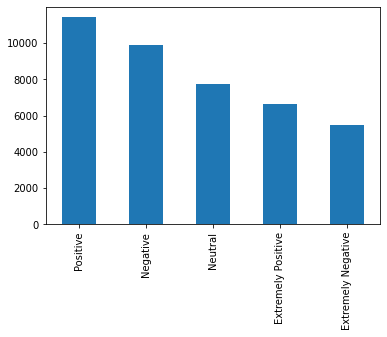

In [10]:
df_train["Sentiment"].value_counts().plot.bar()

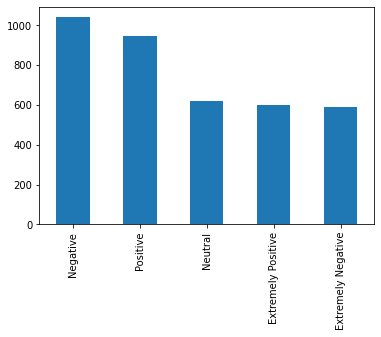

In [11]:
df_test["Sentiment"].value_counts().plot.bar()

In [12]:
df_train["Sentiment"].replace({"Extremely Positive":2,"Positive":2, "Extremely Negative":0,"Negative":0,"Neutral":1},inplace=True)
df_test["Sentiment"].replace({"Extremely Positive":2,"Positive":2, "Extremely Negative":0,"Negative":0,"Neutral":1},inplace=True)

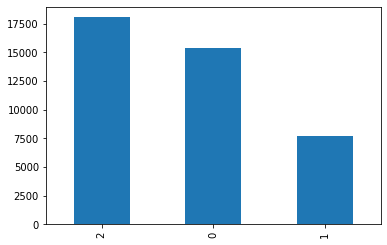

In [13]:
df_train["Sentiment"].value_counts().plot.bar()

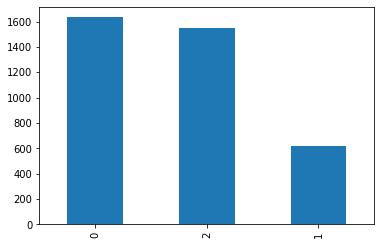

In [14]:
df_test["Sentiment"].value_counts().plot.bar()

# NLP Process

**NLP projesi adımları**

1-Bütün cümleler küçük harfe çevirilir.

2-Noktalama işaretleri kaldırılır.

3-Rakamları kaldır.

4-Satır sonu,\n enter a basılmışsa \r
Yazı yazarken enter'a basarsan görülmeyen \r koyar bilgisayar.

5-stop words(gereksiz kelimeler) leri kaldır.(am/is/are gibi)

6-Tokenize işlemi yapıyoruz

7-Lemma ve stemma uygula(ekleri kaldırıp kökleri buluyoruz)

8-vectorizer ile yazıları rakama atıyoruz(dummy gibi).

In [15]:
df_train["OriginalTweet"]=df_train["OriginalTweet"].str.lower() #küçük harfe çevrildi
df_train["OriginalTweet"]=df_train["OriginalTweet"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df_train["OriginalTweet"]=df_train["OriginalTweet"].str.replace("\d+","") #d digit rakamları kaldırır
df_train["OriginalTweet"]=df_train["OriginalTweet"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [16]:
df_test["OriginalTweet"]=df_test["OriginalTweet"].str.lower() #küçük harfe çevrildi
df_test["OriginalTweet"]=df_test["OriginalTweet"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df_test["OriginalTweet"]=df_test["OriginalTweet"].str.replace("\d+","") #d digit rakamları kaldırır
df_test["OriginalTweet"]=df_test["OriginalTweet"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [17]:
df_train["Sentiment"].replace({"Positive":2,"Neutral":1,"Negative":0},inplace=True)
df_test["Sentiment"].replace({"Positive":2,"Neutral":1,"Negative":0},inplace=True)

In [18]:
df_train[["OriginalTweet","Sentiment"]]

,OriginalTweet,Sentiment
0,menyrbie phil_gahan chrisitv httpstcoifzfanpa ...,1
1,advice talk to your neighbours family to excha...,2
2,coronavirus australia woolworths to give elder...,2
3,my food stock is not the only one which is emp...,2
4,me ready to go at supermarket during the covid...,0
...,...,...
41152,airline pilots offering to stock supermarket s...,1
41153,response to complaint not provided citing covi...,0
41154,you know itâs getting tough when kameronwilds ...,2
41155,is it wrong that the smell of hand sanitizer i...,1


In [19]:
df_test[["OriginalTweet","Sentiment"]]

,OriginalTweet,Sentiment
0,trending new yorkers encounter empty supermark...,0
1,when i couldnt find hand sanitizer at fred mey...,2
2,find out how you can protect yourself and love...,2
3,panic buying hits newyork city as anxious shop...,0
4,toiletpaper dunnypaper coronavirus coronavirus...,1
...,...,...
3793,meanwhile in a supermarket in israel people d...,2
3794,did you panic buy a lot of nonperishable items...,0
3795,asst prof of economics cconces was on nbcphila...,1
3796,gov need to do somethings instead of biar je r...,0


#Vectorize and Classificatin Models

In [20]:
# I convert the cleaned text to vector with countvectorizer function.In Machine Learning, vectorization is a step in feature extraction. 
# The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

vect=CountVectorizer(stop_words="english")
x_train_dtm=vect.fit_transform(df_train["OriginalTweet"])
x_test_dtm=vect.transform(df_test["OriginalTweet"])

In [21]:
x_train_dtm.shape,x_test_dtm.shape

((41157, 83085), (3798, 83085))

In [22]:
y_train=df_train["Sentiment"]
y_test=df_test["Sentiment"]

In [23]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

cvec_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
cvec=pd.DataFrame(columns=cvec_col)

for i in classifiers:
    pred=i.fit(x_train_dtm,y_train).predict(x_test_dtm)
    name = i.__class__.__name__
    #Yukarıda tanımladığımız modelleri sırasıyla çağıracağız ve isminide tabloya bu kod ile ekliyoruz.
    
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred,average='weighted')
    f1=f1_score(y_test,pred,average='weighted')
    recall=recall_score(y_test,pred,average='weighted')

    cvec_entry=pd.DataFrame([[name,'CountVectorizer',accuracy*100,precision*100,f1*100,recall*100]],columns=cvec_col)
    #score ları 100 ile çarpmamın sebebi , yüzde başarı oranının daha net görülebilmesi
    cvec=cvec.append(cvec_entry)

cvec

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,CountVectorizer,78.120063,78.170308,78.134380,78.120063
0,KNeighborsClassifier,CountVectorizer,32.174829,54.405171,31.440769,32.174829
0,DecisionTreeClassifier,CountVectorizer,65.929437,66.398298,66.005217,65.929437
0,RandomForestClassifier,CountVectorizer,72.380200,72.593627,72.421292,72.380200
0,AdaBoostClassifier,CountVectorizer,60.084255,54.425733,54.698605,60.084255
0,GradientBoostingClassifier,CountVectorizer,59.452343,59.120044,54.421155,59.452343
0,MultinomialNB,CountVectorizer,66.350711,68.488616,62.351688,66.350711
0,BernoulliNB,CountVectorizer,65.113217,68.616529,60.355275,65.113217


### For this dataset the succesful model is logistic regression that predict with %78 accuracy a coronavirus tweet being Positive,Negative or Neutral. 